<h4 style="text-align: center;">시변계수모형 (Unobserved Component Model)</h4>

$\ \  \  \  \  $ \* $y_t =$ 시점 $t$의 안정 시계열 관측치, 종속변수

1. 측정식

$\ \  \  \  \  $ \* $y_t$는 상수항($c$)과 두 종류의 설명변수 $x_t$와 $z_t$에 의해 설명됨

$$y_t = c + x_t \times \beta_{t} + z_t \times \gamma + N(0, \sigma^{2}) $$

$\ \  \  \  \  $ \*  $x_t$의 계수는 시변하고, $z_t$의 계수는 일정하다고 가정 

$\ \  \  \  \  $ \*  $x_t$와 $z_t$는 각각 일변수이거나 다변수 

$\ \  \  \  \  $ \* 모든 설명변수는 안정 시계열 관측치  
 
2. 전환식

$\ \  \  \  \  $ \* 시변계수는 임의보행(random walk with drift) 과정을 따른다고 가정

$$\beta_{t} = \beta_{t-1} + N(0, {\omega}^{2})$$

$\ \  \  \  \  $ \* 시변계수를 안정적인 AR(1)과정으로 추정하는 경우도 있으나, 대부분의 경우 임의보행으로 가정했을 때와 추정결과의 차이가 미미함. 따라서 상대적으로 추정이 용이한 임의보행을 가정

이제 실제자료를 이용해서 추정을 시작합니다!!

<단계 1> 기본 모듈을 불러옵니다. 수정없이 실행하세요.

In [1]:
import numpy as np
import pandas as pd
#from matplotlib import pyplot as plt

<단계 2> BOKpy 모듈을 불러옵니다. 수정없이 실행하세요.

In [2]:
import bok_python as bp 

<단계 3> 자료를 불러옵니다. 그런 다음 종속변수와 설명변수를 정의합니다.

In [3]:
# 자료 불러오기
data0 = pd.read_excel('./test_data/Data_BayesEcon.xlsx',sheet_name='TVP')
data1 = np.asmatrix(data0)
Data = np.asmatrix(data1[1:, 1:], float)

In [4]:
# 종속변수: 전국 아파트매매가격지수 전년동기대비 증가율(%)
Dependent = Data[:, 0] # T by 1

In [5]:
# 설명변수 (총3개): 소비자물가상승률(0), 국고채3년금리(1), 경제심리지수(2)
Independent = Data[:, 1:]

<단계 4> 설병변수 중 계수가 시변하는 설명변수($x_t$)의 인덱스를 정의합니다. 설명변수 중 $x_t$는 최소 1개 이상이어야 하고, $z_t$는 0개 이상이어야 합니다.

In [6]:
# 국고채3년금리(1)와 경제심리지수(2)의 계수는 time-varying
# 즉, 이 예에서 금리와 경제심리가 아파트매매가격지수 증가율에 미치는 영향이 시변한다고 가정 
TVP_index = [1, 2]   # 계수가 time-varying하는 설명변수의 인덱스
# 소비자물가상승률(0)의 인덱스(0)은 TVP_index에 포함되지 않았으므로 소비자물가상승률의 계수는 constant로 추정됩니다.
# 상수항은 자동으로 포함되고, constant로 추정됩니다.

<단계 5> 마지막으로 아래 코드를 실행하시면 추정결과가 도출됩니다. 추정이 완료될 때가지 조금만 기다려주세요.

지금 우도함수 극대화 중입니다.
잠시만 기다려주세요.
10/10 cycle finished
close to constraint (minimum step reached)
극대화 작업이 완료되었습니다.
-----------------------------------------------
로그 우도 =  -328.0233392596011
BIC =  683.1714286066092
-----------------------------------------------


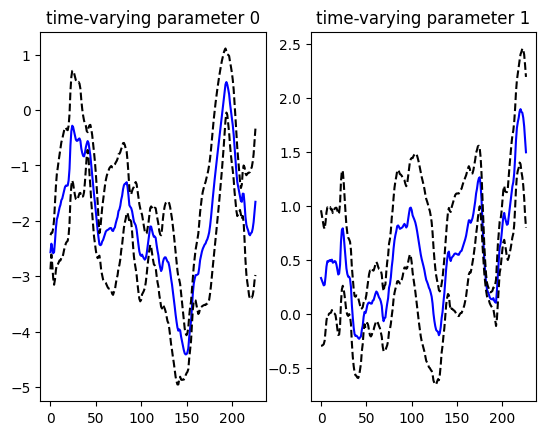

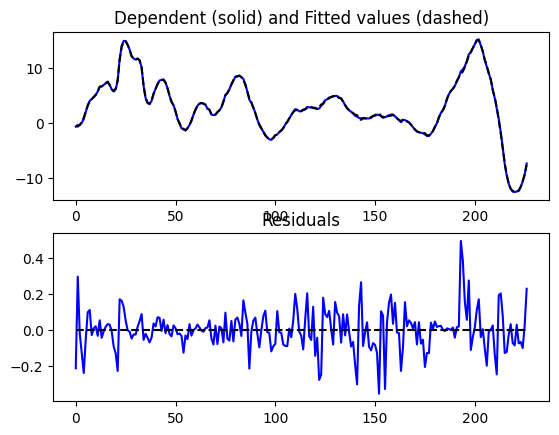

,추정치,표준오차
1번째 시변계수 분산,0.047,0.009
2번째 시변계수 분산,0.016,0.003
1번째 constant coefficient,0.303,0.205
intercept 항,8.387,1.013
오차항의 분산,0.239,0.067


In [7]:
TV_param, TV_param_SE, Table_para, Fitted, Residuals, lnL, BIC = bp.SSM_TVP_model(Dependent, Independent, TVP_index)
# TV_param = TVP 추정치(칼만 스무더), T by len(TVP_index)
# TV_param_SE = TVP 추정치의 표준오차, T by len(TVP_index)
# Fitted = Y 중 설명변수에 의해서 설명되는 부분
# Residuals = 잔차항
# lnL = 로그우도
# BIC = 베이지안 정보기준
# 시변계수 추정결과 그림에서 Dashed line은 2SE Band입니다.
Table_para # Table_para = 파라메터 추정결과 (DataFrame)